# Data augmentation

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files
from imgaug import augmenters as iaa
import imageio
from torchvision import transforms
from PIL import Image

In [2]:
uploaded = files.upload()

Saving gatito.png to gatito.png


#Transformaciones con `torchvision`

### 1. Transformaciones disponibles en torchvision

El modulo de torchvision contiene diferentes transformaciones y se pueden encadenar utilizando
`Compose`. las transformaciones se aplican siguiendo el orden de la lista.

Consultar:  
[Transformaciones y Data augmentation](https://pytorch.org/vision/stable/transforms.html)

In [4]:
# Escribir las transformaciones para preparar a las imágenes
data_transform = transforms.Compose([transforms.Resize(size=(100, 100)), # Redimensiona la imagen de entrada al tamaño dado
                                     transforms.GaussianBlur(3), # Agrega ruido Gaussiano a la imagen
                                     transforms.RandomHorizontalFlip(1), #Voltea la imagen horizontalmente con una cierta probabilidad.
                                    transforms.ToTensor()])

In [5]:
# Abrir imagen
img = Image.open('/content/gatito.png').convert('RGB') # Convertir a RGB si la imagen es png

Información de las imágenes
-----------------------------------------------------------
Tamaño de la imagen original: (315, 417, 3)
-----------------------------------------------------------
Tamaño de la imagen transformada: torch.Size([100, 100, 3])




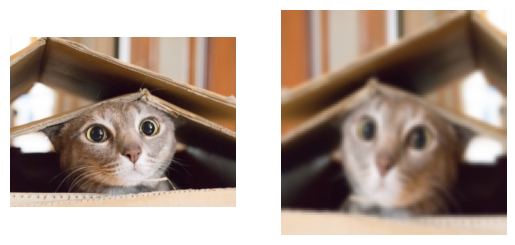

In [6]:
# Transformación de la imagen
transformed_image = data_transform(img).permute(1, 2, 0) # Para visualizar la imagen,se modifica el tensor con forma (C,H,W) a (H,W,C)

## Información de las imágenes
print("Información de las imágenes")
print("-----------------------------------------------------------")
## ------ Imágen original ------
arr_img = np.asarray(img)
print(f"Tamaño de la imagen original: {arr_img.shape}")
print("-----------------------------------------------------------")
## ------ Imágen transformada ------
print(f"Tamaño de la imagen transformada: {transformed_image.shape}")
print("\n")

# Visualizar imagen original y tranformación
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
ax[0].axis("off")

ax[1].imshow(transformed_image)
ax[1].axis("off")
plt.show()

### 2. Transformaciones AutoAugment  en torchvision

AutoAugment es una técnica común de aumento de datos que puede mejorar la precisión de los modelos de clasificación de imágenes.   

Consultar:  
[Transformaciones y Data augmentation](https://pytorch.org/vision/stable/transforms.html)  ["AutoAugment: Learning Augmentation Strategies from Data".](https://arxiv.org/pdf/1805.09501.pdf)  
["TrivialAugment: Tuning-free Yet State-of-the-Art Data Augmentation"](https://arxiv.org/pdf/2103.10158.pdf)  
[Comparing Different Automatic Image Augmentation Methods in PyTorch](https://sebastianraschka.com/blog/2023/data-augmentation-pytorch.html)

In [7]:
# Escribir las transformaciones para preparar a las imágenes
data_transform_1 = transforms.Compose([transforms.Resize(size=(100, 100)),
                                    transforms.TrivialAugmentWide(),
                                    transforms.ToTensor()])

In [8]:
# Escribir las transformaciones para preparar a las imágenes
data_transform_2 = transforms.Compose([transforms.Resize(size=(100, 100)),
                                    transforms.AutoAugment(),
                                    transforms.ToTensor()])

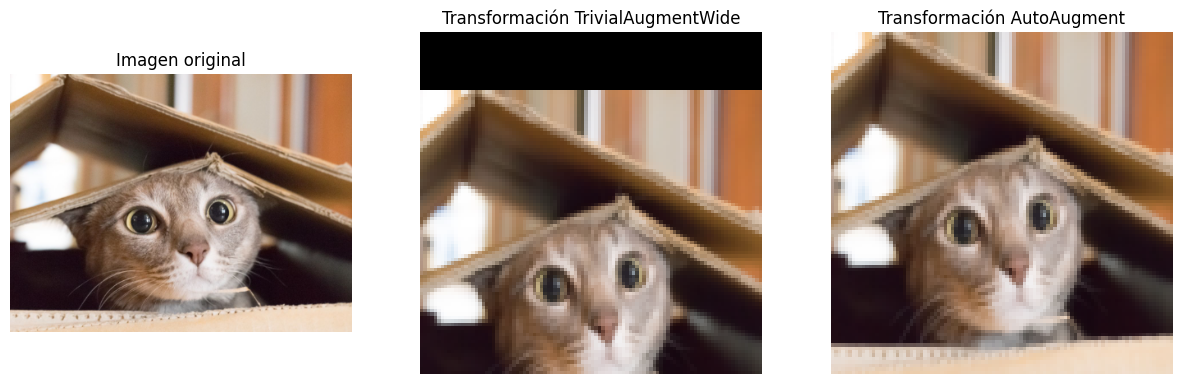

In [9]:
# Transformación de la imagen
transformed_image_1 = data_transform_1(img).permute(1, 2, 0) # Para visualizar la imagen,se modifica el tensor con forma (C,H,W) a (H,W,C)
transformed_image_2 = data_transform_2(img).permute(1, 2, 0) # Para visualizar la imagen,se modifica el tensor con forma (C,H,W) a (H,W,C)

# Visualizar imagen original y tranformación
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Imagen original')
plt.axis('off')
plt.imshow(img)

plt.subplot(132)
plt.title('Transformación TrivialAugmentWide')
plt.axis('off')
plt.imshow(transformed_image_1)

plt.subplot(133)
plt.title('Transformación AutoAugment')
plt.axis('off')
plt.imshow(transformed_image_2)
plt.show()

## Transformaciones con librería `imgaug`

Se puede realizar transformaciones más complejas con `imgaug`.

Además de tener más técnicas de transformación de imágenes, `imgaug` también tiene comportamientos interesantes como **Sometimes**, **SomeOf** y **OneOf**.

**Importante:**
Para utilizar `imgaug` es importante convertir las imágenes `PIL` a arreglos numpy antes de aplicar las transformaciones.

Consultar:  
[Imgaug](https://imgaug.readthedocs.io/en/latest/index.html)

In [10]:
# Leer imagen
image = imageio.v2.imread('/content/gatito.png')

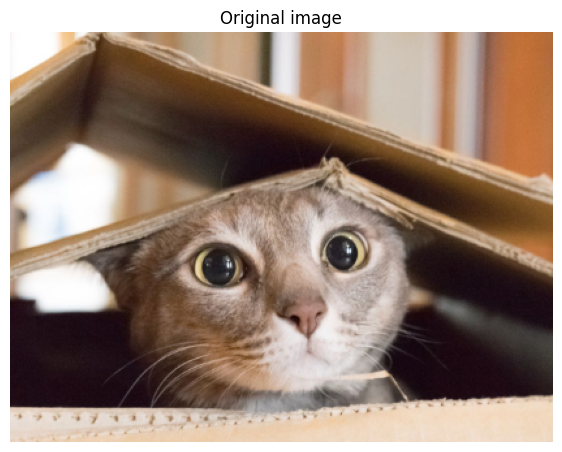

In [11]:
# Visualizar imagen
fig = plt.figure(figsize=(7, 7))
plt.title('Original image')
plt.axis('off')
plt.imshow(image)
plt.show()

In [12]:
def show_differences(image, img_transformation):
    fig = plt.figure(figsize=(5, 5))
    plt.subplot(121)
    plt.title('Imagen original')
    plt.axis('off')
    plt.imshow(image)

    plt.subplot(122)
    plt.title('Transformación')
    plt.axis('off')
    plt.imshow(img_transformation)
    plt.show()

In [13]:
# Rota imágen de -45 a 45 grados
rotate = iaa.Affine(rotate=(-45,45))

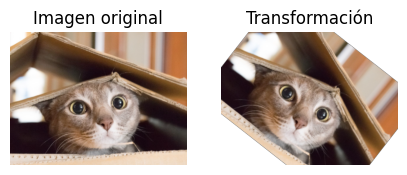

In [14]:
img_aug = rotate(image=image)
show_differences(image, img_aug)

In [15]:
# Escala imágenes al 50 o 150% de su tamaño original
scale = iaa.Affine(scale=(0.5, 1.5))

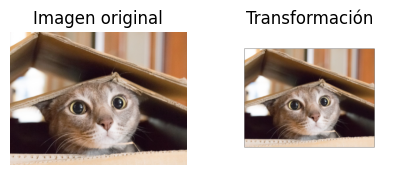

In [16]:
img_aug = scale(image=image)
show_differences(image, img_aug)

In [17]:
# Realza la imagen y superpone el resultado con la imagen original
emboss = iaa.Emboss(alpha=0.8, strength=1.0)

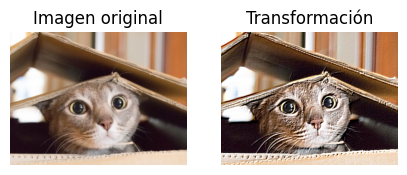

In [18]:
img_aug = emboss(image=image)
show_differences(image, img_aug)

In [19]:
#Voltea con una probabilidad las imágenes horizontalmente
mirror = iaa.Fliplr(1)

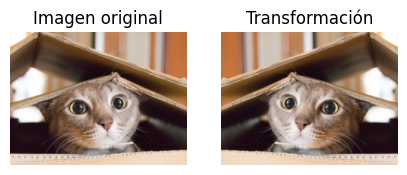

In [20]:
img_aug = mirror(image=image)
show_differences(image, img_aug)

In [21]:
# Agrega ruido Gaussiano a las imágenes
noise = iaa.AdditiveGaussianNoise(0, 0.2*255)

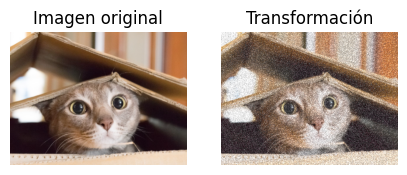

In [22]:
img_aug = noise(image=image)
show_differences(image, img_aug)

Se puede crear un flujo de varias transformaciones
- **Sequential**: Lista de transformaciones que se aplican en orden secuencial o aleatorio.
- **Sometimes**: Transforma sólo el p por ciento de todas las imágenes con uno o más transformaciones.
- **SomeOf**: Aplica algunas transformaciones en la lista.
- **OneOf**: Siempre aplica una de sus transformaciones.

Consultar:  
[Augmenters.meta](https://imgaug.readthedocs.io/en/latest/source/overview/meta.html)

In [24]:
aug_pipeline = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.AdditiveGaussianNoise(0, 0.2*255)),
    iaa.SomeOf(3,[ # Selecciona solo a dos transformaciones de la lista
        iaa.Affine(rotate=(-45,45)),
        iaa.Emboss(alpha=0.8, strength=1.0),
        iaa.Fliplr(1.0),
        iaa.Dropout((0.01, 0.1), per_channel=0.5)
    ]),
    iaa.OneOf([iaa.Affine(scale=(0.5, 1.5)),
               iaa.Sharpen(alpha=0.5)
    ])
    ],
random_order=True# Aplica las trasnfromaciones en orden aleatorio
)

images_aug = np.array([aug_pipeline.augment_image(image) for _ in range(10)])

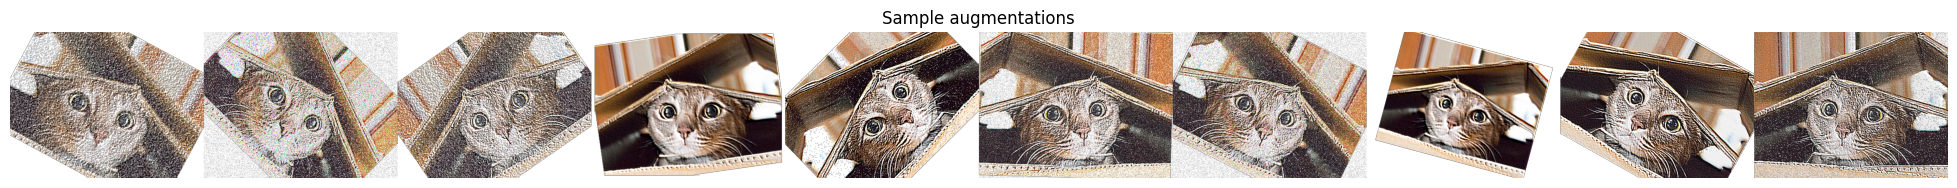

In [25]:
plt.figure(figsize=(25,15))
plt.axis('off')
plt.imshow(np.hstack(images_aug))
plt.title('Sample augmentations')
plt.show()